# Prova módulo 3

### Por favor, enviar a prova com o notebook final rodado

<a style="color: #0193F7; display: block; margin: 0 auto; text-align: center; background-color: #444; padding: 2px 6px; border-radius: 4px" href="https://s3-sa-east-1.amazonaws.com/lcpi/204eafa8-18cd-4749-a67a-9f3db1cb8e10.zip">Datasets para utilizar na Avaliação</a>

_________

In [1]:
# importando o matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
cm = 1/2.54  # centimeters in inches
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
import numpy as np 
import pandas as pd
import seaborn as sns

# Questão 1

Dado o dataset `gas.csv`, carregue-o em um DataFrame e, em seguida:

1. Visualize suas cinco primeiras linhas e imprima suas colunas.
2. Obtenha a emissão mínima e máxima de gases ao longo de todo o período de observação.
3. Crie uma nova coluna no DataFrame que contenha apenas o ano (como `int`) presente na coluna `DATE`.
4. Faça um agrupamento no DataFrame com o intuito de obter qual foi o ano que apresentou, **em média**, uma emissão máxima de gases.
5. Crie um gráfico de barras que apresente a emissão média de gases entre os anos de 1980 e 2019.



In [2]:
df_gas = pd.read_csv('../prova/datasets_avaliacao/gas.csv')
df_gas['DATE'] = pd.to_datetime(df_gas.DATE)
df_gas.columns = ['Data','Emissao']

Visualize suas cinco primeiras linhas e imprima suas colunas.

In [3]:
df_gas.head(5)

,Data,Emissao
0,1939-01-01,3.3842
1,1939-02-01,3.4100
2,1939-03-01,3.4875
3,1939-04-01,3.5133
4,1939-05-01,3.5133


In [4]:
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Data     965 non-null    datetime64[ns]
 1   Emissao  965 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.1 KB


Obtenha a emissão mínima e máxima de gases ao longo de todo o período de observação.

In [5]:
df_gas['Emissao'].max()

128.9071

In [6]:
df_gas['Emissao'].min()

3.3842

In [7]:
df_gas['Emissao'].describe()

count    965.000000
mean      54.443959
std       35.370360
min        3.384200
25%       19.116700
50%       54.684100
75%       87.488500
max      128.907100
Name: Emissao, dtype: float64

Crie uma nova coluna no DataFrame que contenha apenas o ano (como int) presente na coluna DATE.

In [8]:
df_gas['Ano'] = pd.DatetimeIndex(df_gas['Data']).year

Faça um agrupamento no DataFrame com o intuito de obter qual foi o ano que apresentou, em média, uma emissão máxima de gases.

In [9]:
df_gas.groupby('Ano').mean().sort_index(ascending=False)

,Emissao
Ano,
2019,104.903940
2018,105.929333
2017,101.516308
2016,102.296433
2015,102.741442
...,...
1943,5.530525
1942,5.005225
1941,4.456242


In [10]:
df_gas_1980_2019 = df_gas[df_gas['Ano'].between(1980, 2019)]
df_gas_media = df_gas_1980_2019.groupby('Ano').mean().reset_index()
df_gas_media

,Ano,Emissao
0,1980,58.142642
1,1981,58.948483
2,1982,56.980392
3,1983,57.401850
4,1984,60.807350
5,1985,62.316367
6,1986,62.873992
7,1987,65.911900
8,1988,69.902892
9,1989,72.088675


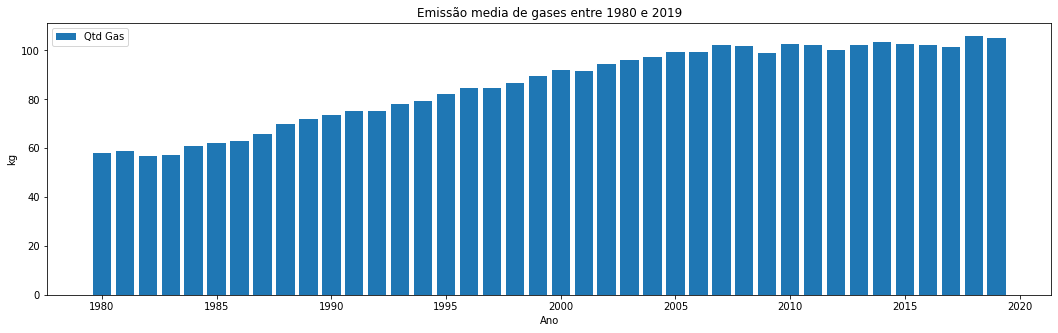

In [11]:
f, ax = plt.subplots(figsize=(18,5))
plt.title("Emissão media de gases entre 1980 e 2019")

plt.bar(df_gas_media['Ano'],df_gas_media['Emissao'], label='Qtd Gas')
plt.xlabel('Ano')
plt.ylabel("kg")
plt.legend(loc=0)

df_______________
____________

# Questão 2


Com a tabela de vendas de jogos de vídeo-games (`videogames.csv`), indique:

1. Quais jogos estão no Top 10 de Vendas Globais nas plataformas PS3, Wii, X360 e PC.
2. A proporção (percentual) de jogos criados por gênero, em: a) tabela; b)gráfico de barras; c) gráfico de pizza.
3. Um gráfico de linha com a quantidade de vendas, em média, por ano, separadas pelas plataformas PS3, Wii, X360 e PSP.



In [12]:
df_videogames = pd.read_csv('../prova/datasets_avaliacao/videogame.csv')

In [13]:
df_videogames[df_videogames['Platform'].isin(['PS3', 'Wii', 'X360', 'PC'])]


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
...,...,...,...,...,...,...,...,...,...,...,...
16574,16577,Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...,Wii,2008.0,Racing,Takara Tomy,0.00,0.00,0.01,0.00,0.01
16577,16580,Damnation,PC,2009.0,Shooter,Codemasters,0.00,0.01,0.00,0.00,0.01
16581,16584,Fit & Fun,Wii,2011.0,Sports,Unknown,0.00,0.01,0.00,0.00,0.01
16585,16588,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01


## Top 10 de Vendas Globais na plataforma PS3

In [14]:
df_videogames[df_videogames['Platform']=='PS3'].sort_values(by='Global_Sales', ascending=False)[:10]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
34,35,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
37,38,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
40,41,Call of Duty: Black Ops,PS3,2010.0,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
54,55,Gran Turismo 5,PS3,2010.0,Racing,Sony Computer Entertainment,2.96,4.88,0.81,2.12,10.77
55,56,Call of Duty: Modern Warfare 2,PS3,2009.0,Shooter,Activision,4.99,3.69,0.38,1.63,10.69
56,57,Grand Theft Auto IV,PS3,2008.0,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.57
67,68,Call of Duty: Ghosts,PS3,2013.0,Shooter,Activision,4.09,3.73,0.38,1.38,9.59
82,83,FIFA Soccer 13,PS3,2012.0,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.24
103,104,Battlefield 3,PS3,2011.0,Shooter,Electronic Arts,2.85,2.93,0.35,1.10,7.23


 ## Top 10 de Vendas Globais na plataforma  Wii

In [15]:
df_videogames[df_videogames['Platform']=='Wii'].sort_values(by='Global_Sales', ascending=False)[:10]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
13,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
39,40,Super Smash Bros. Brawl,Wii,2008.0,Fighting,Nintendo,6.75,2.61,2.66,1.02,13.04
48,49,Super Mario Galaxy,Wii,2007.0,Platform,Nintendo,6.16,3.40,1.20,0.76,11.52
60,61,Just Dance 3,Wii,2011.0,Misc,Ubisoft,6.05,3.15,0.00,1.07,10.26


 ## Top 10 de Vendas Globais na plataforma X360

In [16]:
df_videogames[df_videogames['Platform']=='X360'].sort_values(by='Global_Sales', ascending=False)[:10]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
29,30,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
31,32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
35,36,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.73
36,37,Call of Duty: Modern Warfare 2,X360,2009.0,Shooter,Activision,8.52,3.63,0.08,1.29,13.51
43,44,Halo 3,X360,2007.0,Shooter,Microsoft Game Studios,7.97,2.83,0.13,1.21,12.14
51,52,Grand Theft Auto IV,X360,2008.0,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.02
61,62,Call of Duty: Ghosts,X360,2013.0,Shooter,Activision,6.72,2.63,0.04,0.82,10.21
62,63,Halo: Reach,X360,2010.0,Shooter,Microsoft Game Studios,7.03,1.98,0.08,0.78,9.88


 ## Top 10 de Vendas Globais na plataforma PC

In [17]:
df_videogames[df_videogames['Platform']=='PC'].sort_values(by='Global_Sales', ascending=False)[:10]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
83,84,The Sims 3,PC,2009.0,Simulation,Electronic Arts,0.98,6.42,0.00,0.71,8.11
137,138,World of Warcraft,PC,2004.0,Role-Playing,Activision,0.07,6.21,0.00,0.00,6.28
181,182,Diablo III,PC,2012.0,Role-Playing,Activision,2.43,2.15,0.00,0.62,5.20
194,195,Microsoft Flight Simulator,PC,1996.0,Simulation,Microsoft Game Studios,3.22,1.69,0.00,0.20,5.12
217,218,StarCraft II: Wings of Liberty,PC,2010.0,Strategy,Activision,2.56,1.68,0.00,0.59,4.83
267,268,Warcraft II: Tides of Darkness,PC,1995.0,Strategy,Activision,1.70,2.27,0.00,0.23,4.21
281,282,Half-Life,PC,1997.0,Shooter,Vivendi Games,4.03,0.00,0.09,0.00,4.12
288,289,World of Warcraft: The Burning Crusade,PC,2007.0,Role-Playing,Activision,2.57,1.52,0.00,0.00,4.09
310,311,The Elder Scrolls V: Skyrim,PC,2011.0,Role-Playing,Bethesda Softworks,1.15,2.09,0.00,0.64,3.88
328,329,The Sims: Unleashed,PC,2002.0,Simulation,Electronic Arts,2.03,1.56,0.00,0.17,3.76


testar apos prova

In [99]:
df = df_videogames[df_videogames['Platform'].isin(['PS3', 'Wii', 'X360', 'PC'])]

In [105]:
s = df.groupby(['Platform'])['Global_Sales'].rank('dense', ascending=True)
s.head(10)


0     219.0
2     218.0
3     217.0
7     216.0
8     215.0
13    214.0
14    213.0
15    261.0
16    256.0
23    260.0
Name: Global_Sales, dtype: float64

In [88]:
df.sort_values(['Platform','Global_Sales'], ascending=False).groupby(['Platform']).head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
29,30,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
31,32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
35,36,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.73
36,37,Call of Duty: Modern Warfare 2,X360,2009.0,Shooter,Activision,8.52,3.63,0.08,1.29,13.51
43,44,Halo 3,X360,2007.0,Shooter,Microsoft Game Studios,7.97,2.83,0.13,1.21,12.14
51,52,Grand Theft Auto IV,X360,2008.0,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.02
61,62,Call of Duty: Ghosts,X360,2013.0,Shooter,Activision,6.72,2.63,0.04,0.82,10.21
62,63,Halo: Reach,X360,2010.0,Shooter,Microsoft Game Studios,7.03,1.98,0.08,0.78,9.88


In [98]:
df.groupby(['Platform'], as_index=False).get_group("Wii").nlargest(10,'Global_Sales')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
13,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
39,40,Super Smash Bros. Brawl,Wii,2008.0,Fighting,Nintendo,6.75,2.61,2.66,1.02,13.04
48,49,Super Mario Galaxy,Wii,2007.0,Platform,Nintendo,6.16,3.40,1.20,0.76,11.52
60,61,Just Dance 3,Wii,2011.0,Misc,Ubisoft,6.05,3.15,0.00,1.07,10.26


In [91]:
df.groupby(['Platform'], as_index=False).apply(lambda x: x.nlargest(10, 'Global_Sales'))

Rank                                    Name Platform    Year  \
0 83     84                              The Sims 3       PC  2009.0   
  137   138                       World of Warcraft       PC  2004.0   
  181   182                              Diablo III       PC  2012.0   
  194   195              Microsoft Flight Simulator       PC  1996.0   
  217   218          StarCraft II: Wings of Liberty       PC  2010.0   
  267   268          Warcraft II: Tides of Darkness       PC  1995.0   
  281   282                               Half-Life       PC  1997.0   
  288   289  World of Warcraft: The Burning Crusade       PC  2007.0   
  310   311             The Elder Scrolls V: Skyrim       PC  2011.0   
  328   329                     The Sims: Unleashed       PC  2002.0   
1 16     17                      Grand Theft Auto V      PS3  2013.0   
  34     35              Call of Duty: Black Ops II      PS3  2012.0   
  37     38          Call of Duty: Modern Warfare 3      PS3  2011.0   
  40     41                 Call of Duty: Black Ops      PS3  2010.0   
  54     55                          Gran Turismo 5      PS3  2010.0   
  55     56          Call of Duty: Modern Warfare 2      PS3  2009.0   
  56     57                     Grand Theft Auto IV      PS3  2008.0   
  67     68                    Call of Duty: Ghosts      PS3  2013.0   
  82     83                          FIFA Soccer 13      PS3  2012.0   
  103   104                           Battlefield 3      PS3  2011.0   
2 0       1                              Wii Sports      Wii  2006.0   
  2       3                          Mario Kart Wii      Wii  2008.0   
  3       4                       Wii Sports Resort      Wii  2009.0   
  7       8                                Wii Play      Wii  2006.0   
  8       9               New Super Mario Bros. Wii      Wii  2009.0   
  13     14                                 Wii Fit      Wii  2007.0   
  14     15                            Wii Fit Plus      Wii  2009.0   
  39     40                 Super Smash Bros. Brawl      Wii  2008.0   
  48     49                      Super Mario Galaxy      Wii  2007.0   
  60     61                            Just Dance 3      Wii  2011.0   
3 15     16                      Kinect Adventures!     X360  2010.0   
  23     24                      Grand Theft Auto V     X360  2013.0   
  29     30          Call of Duty: Modern Warfare 3     X360  2011.0   
  31     32                 Call of Duty: Black Ops     X360  2010.0   
  35     36              Call of Duty: Black Ops II     X360  2012.0   
  36     37          Call of Duty: Modern Warfare 2     X360  2009.0   
  43     44                                  Halo 3     X360  2007.0   
  51     52                     Grand Theft Auto IV     X360  2008.0   
  61     62                    Call of Duty: Ghosts     X360  2013.0   
  62     63                             Halo: Reach     X360  2010.0   

              Genre                    Publisher  NA_Sales  EU_Sales  \
0 83     Simulation              Electronic Arts      0.98      6.42   
  137  Role-Playing                   Activision      0.07      6.21   
  181  Role-Playing                   Activision      2.43      2.15   
  194    Simulation       Microsoft Game Studios      3.22      1.69   
  217      Strategy                   Activision      2.56      1.68   
  267      Strategy                   Activision      1.70      2.27   
  281       Shooter                Vivendi Games      4.03      0.00   
  288  Role-Playing                   Activision      2.57      1.52   
  310  Role-Playing           Bethesda Softworks      1.15      2.09   
  328    Simulation              Electronic Arts      2.03      1.56   
1 16         Action         Take-Two Interactive      7.01      9.27   
  34        Shooter                   Activision      4.99      5.88   
  37        Shooter                   Activision      5.54      5.82   
  40        Shooter                   Activisi

In [19]:
df_genres = df_videogames['Genre'].value_counts(normalize=True)*100
df_genres

Action          19.978311
Sports          14.134233
Misc            10.477166
Role-Playing     8.964936
Shooter          7.892517
Adventure        7.747921
Racing           7.525003
Platform         5.337993
Simulation       5.223521
Fighting         5.109049
Strategy         4.102904
Puzzle           3.506447
Name: Genre, dtype: float64

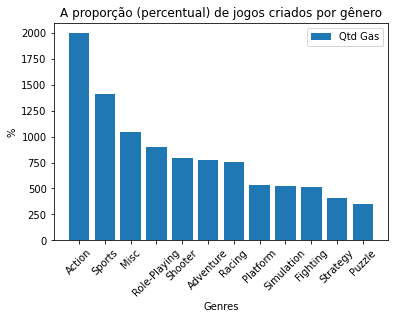

In [20]:
plt.title("A proporção (percentual) de jogos criados por gênero")
plt.bar(df_genres.index,df_genres*100, label='Qtd Gas')
plt.xlabel('Genres')
plt.ylabel("%")
plt.xticks(rotation=45)
plt.legend(loc=0)

In [21]:
dfPie = df_videogames.groupby('Genre')['Name'].agg(['count']).reset_index()
dfPie

,Genre,count
0,Action,3316
1,Adventure,1286
2,Fighting,848
3,Misc,1739
4,Platform,886
5,Puzzle,582
6,Racing,1249
7,Role-Playing,1488
8,Shooter,1310
9,Simulation,867


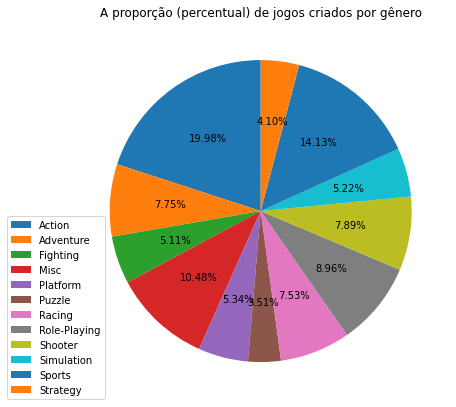

In [22]:
figsizePX=(700*px, 500*px) # com pixels
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig, ax = plt.subplots(figsize=figsizePX) 

ax.pie(dfPie['count'], startangle=90, autopct='%1.2f%%')  # Plotar pizza.
ax.set_title("A proporção (percentual) de jogos criados por gênero")  # Add a title to the axes.
plt.legend(dfPie['Genre'], loc=0, bbox_to_anchor=(0.1,0.5))


## Um gráfico de linha com a quantidade de vendas, em média, por ano, separadas pelas plataformas PS3, Wii, X360 e PSP.

In [23]:
df = df_videogames[df_videogames['Platform'].isin(['PS3', 'Wii', 'X360', 'PSP'])]


In [24]:
table = pd.pivot_table(df, values='Global_Sales', index=['Year', 'Platform'],aggfunc=np.mean)
table.head(1)

,,Global_Sales
Year,Platform,
2004.0,PSP,0.475333


<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

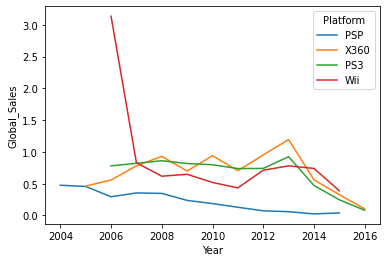

In [25]:
sns.lineplot(data=table, x='Year', y='Global_Sales', hue="Platform")

_______________
____________

# Questão 3

Considerando os dados do dataset `fish.csv`, faça uma análise exploratória dos dados, criando:

1. Vários gráficos (em uma mesma figura) combinando cada par de característica (*feature*) dos peixes, e atribuindo uma cor diferente para cada espécie.
2. Crie um gráfico de distribuição da largura dos peixes (`Width`). Não deixe de incluir o KDE.
3. Crie um mapa de calor que apresente a correlação entre cada *feature* do peixe. Anote os dados no gráfico e utilize o `cmap=coolwarm`.


In [26]:
df_fish = pd.read_csv('../prova/datasets_avaliacao/fish.csv')

In [27]:
df_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.1+ KB


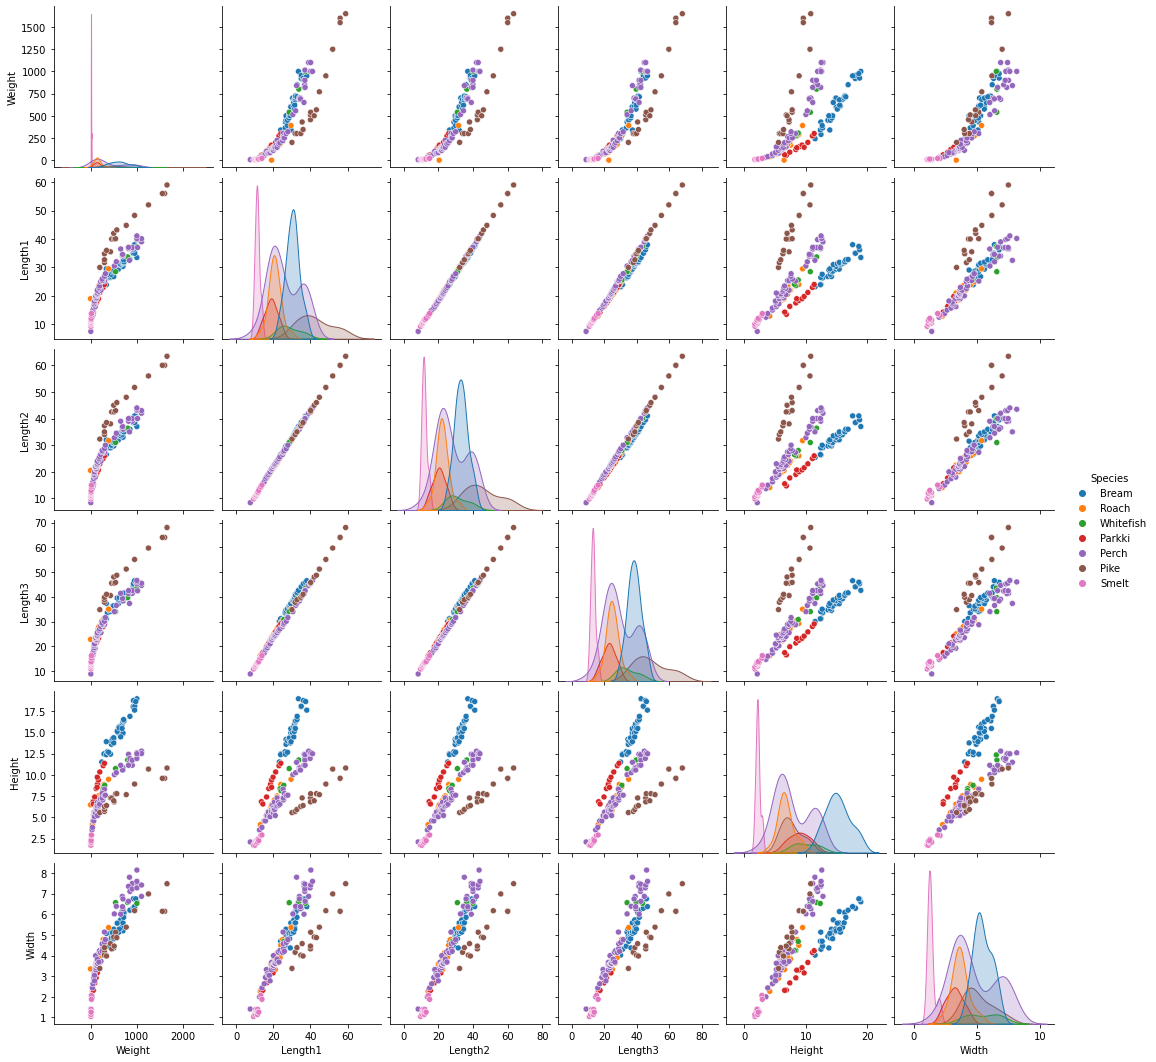

In [28]:

sns.pairplot(data=df_fish, hue='Species')

2. Crie um gráfico de distribuição da largura dos peixes (`Width`). Não deixe de incluir o KDE.

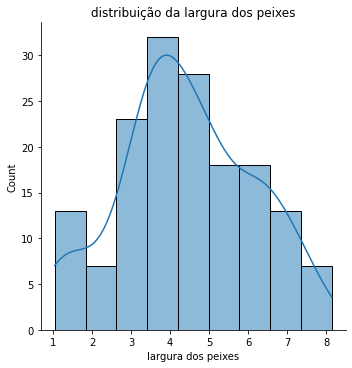

In [29]:
ax = sns.displot(data=df_fish['Width'], kde=True)
plt.title('distribuição da largura dos peixes')
ax.set(xlabel='largura dos peixes', ylabel='Count')

3. Crie um mapa de calor que apresente a correlação entre cada *feature* do peixe. Anote os dados no gráfico e utilize o `cmap=coolwarm`.

<AxesSubplot:title={'center':'correlação entre cada feature do peixe'}>

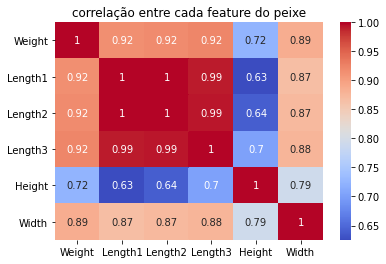

In [30]:
corr = df_fish.corr()
plt.title("correlação entre cada feature do peixe")
sns.heatmap(data=corr, cmap='coolwarm', annot=True)

# Questão 4

Utilize os dados do arquivo `salaries.csv` para explorar as diferenças salariais entre homens e mulheres que estão em um mesmo posto. Por exemplo, *Female Managers* e *Male Managers*.

In [31]:
df_salaries = pd.read_csv('../prova/datasets_avaliacao/salarios.csv', sep=';')

In [32]:
df_salaries.describe()

,year,femalesmanagers,femaleprofessionals,femaletechniciansandtradesworkers,femalecommunityandpersonalserviceworkers,femaleclericalandadministrativeworkers,femalesalesworkers,femalemachineryoperatorsanddrivers,femalelabourers,malemanagers,...,malemachineryoperatorsanddrivers,malelabourers,personmanagers,personprofessionals,persontechniciansandtradesworkers,personcommunityandpersonalserviceworkers,personclericalandadministrativeworkers,personsalesworkers,personmachineryoperatorsanddrivers,personlabourers
count,14.0000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.000000,14.000000,14.00000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,2010.5000,35.964286,37.065714,22.979286,22.597857,26.558571,19.630714,23.685000,19.953571,42.518571,...,26.629286,21.987143,40.051429,39.708571,27.29000,24.186429,27.736429,21.092143,26.342143,21.250000
std,4.1833,6.134298,6.119284,3.488287,3.277464,4.516377,3.383354,5.075312,3.054882,6.324777,...,4.064915,3.258960,6.095062,6.231100,4.18193,3.415309,4.643856,3.419436,4.138499,3.177241
min,2004.0000,26.140000,29.020000,17.900000,18.010000,19.980000,14.790000,16.270000,16.320000,33.020000,...,20.920000,17.210000,30.600000,31.220000,21.42000,19.030000,20.800000,16.130000,20.390000,16.950000
25%,2007.2500,32.835000,32.180000,20.217500,20.130000,23.370000,16.945000,20.567500,17.337500,38.467500,...,23.220000,19.707500,36.667500,35.217500,23.68750,21.552500,24.647500,18.545000,22.745000,18.857500
50%,2010.5000,35.730000,36.000000,23.025000,22.610000,26.295000,19.510000,22.830000,19.500000,42.770000,...,27.205000,21.925000,39.675000,39.395000,27.82500,24.255000,27.675000,20.995000,26.780000,21.075000
75%,2013.7500,40.905000,42.835000,25.697500,24.882500,30.735000,22.112500,28.552500,22.417500,47.977500,...,29.785000,24.610000,45.155000,45.605000,30.75500,26.840000,31.880000,23.360000,29.585000,24.047500
max,2017.0000,46.020000,47.040000,28.300000,27.840000,33.540000,26.110000,31.910000,24.900000,52.510000,...,33.120000,27.280000,49.800000,49.560000,33.36000,29.280000,35.010000,27.310000,32.840000,26.440000


In [33]:
df_females = df_salaries[['year','females', 'femalesmanagers', 'femaleprofessionals', 'femaletechniciansandtradesworkers', 'femalecommunityandpersonalserviceworkers','femaleclericalandadministrativeworkers','femalemachineryoperatorsanddrivers' , 'femalelabourers']]
df_males = df_salaries[['year','males', 'malemanagers', 'maleprofessionals', 'maletechniciansandtradesworkers', 'malecommunityandpersonalserviceworkers','maleclericalandadministrativeworkers','malemachineryoperatorsanddrivers' , 'malelabourers']]
df_males.columns = ['year','sexo', 'managers', 'professionals', 'techniciansandtradesworkers', 'communityandpersonalserviceworkers','clericalandadministrativeworkers','machineryoperatorsanddrivers' , 'labourers']
df_females.columns = ['year','sexo', 'managers', 'professionals', 'techniciansandtradesworkers', 'communityandpersonalserviceworkers','clericalandadministrativeworkers','machineryoperatorsanddrivers' , 'labourers']


In [34]:
df_total = pd.concat([df_females, df_males])

In [35]:
df_total.columns = ['Ano','Sexo', 'Managers', 'Professionals', 'Technicians and Trades Workers', 'Community and Personalservice Workers','Clerical and Administrative Workers','Machinery Operators and Drivers' , 'Labourers']
df_total.head(5)

,Ano,Sexo,Managers,Professionals,Technicians and Trades Workers,Community and Personalservice Workers,Clerical and Administrative Workers,Machinery Operators and Drivers,Labourers
0,2004,Females,26.14,29.02,17.90,18.01,19.98,16.27,16.48
1,2005,Females,28.10,30.00,18.86,18.20,20.95,21.49,16.71
2,2006,Females,28.60,30.56,19.64,18.84,21.73,17.37,16.32
3,2007,Females,36.43,31.93,20.98,19.85,23.27,18.04,17.54
4,2008,Females,32.68,32.93,20.30,20.97,23.67,20.27,17.27


In [36]:
df_total.tail(5)

,Ano,Sexo,Managers,Professionals,Technicians and Trades Workers,Community and Personalservice Workers,Clerical and Administrative Workers,Machinery Operators and Drivers,Labourers
9,2013,Males,44.85,45.03,30.82,29.20,33.88,29.83,24.25
10,2014,Males,49.55,50.45,31.95,31.96,35.85,30.48,25.22
11,2015,Males,49.02,51.05,33.27,30.74,35.72,30.92,24.73
12,2016,Males,49.77,49.49,31.97,33.35,37.77,29.65,25.64
13,2017,Males,52.51,52.91,34.25,32.63,39.40,33.12,27.28


In [37]:
df_clean_total = df_total.melt( id_vars=['Ano','Sexo'], value_vars=['Managers', 'Professionals', 'Technicians and Trades Workers', 'Community and Personalservice Workers','Clerical and Administrative Workers','Machinery Operators and Drivers' , 'Labourers'], var_name='jobtitle', ignore_index=True)
df_clean_total

,Ano,Sexo,jobtitle,value
0,2004,Females,Managers,26.14
1,2005,Females,Managers,28.10
2,2006,Females,Managers,28.60
3,2007,Females,Managers,36.43
4,2008,Females,Managers,32.68
...,...,...,...,...
191,2013,Males,Labourers,24.25
192,2014,Males,Labourers,25.22
193,2015,Males,Labourers,24.73
194,2016,Males,Labourers,25.64


In [38]:
df_clean_total["Ano"].unique().tolist()

[2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017]

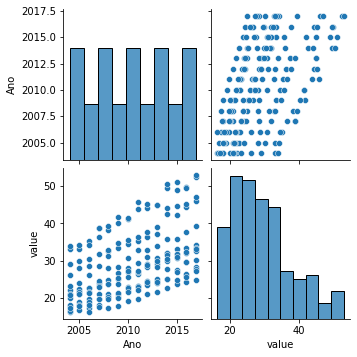

In [39]:
sns.pairplot(df_clean_total)

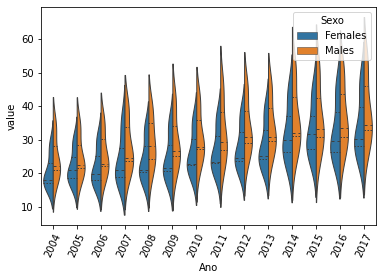

In [40]:
plt.xticks(rotation=65)
ax = sns.violinplot(x='Ano', y='value', data=df_clean_total, hue='Sexo', split=True, inner="quart", linewidth=1)


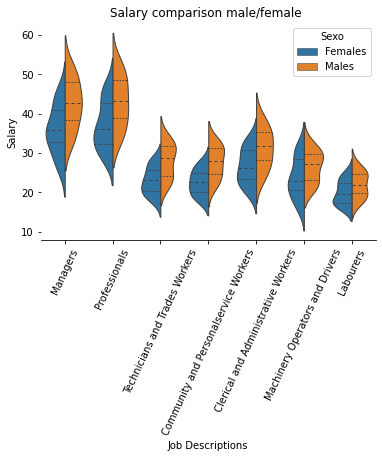

In [41]:
plt.xticks(rotation=65)
plt.title("Salary comparison male/female " )
ax = sns.violinplot(data=df_clean_total, x="jobtitle", y="value", hue="Sexo", split=True, inner="quart", linewidth=1)
sns.despine(left=True)
ax.set(xlabel='Job Descriptions', ylabel='Salary')
plt.show()

In [42]:
df_clean_total[df_clean_total['Ano']==2017]

,Ano,Sexo,jobtitle,value
13,2017,Females,Managers,46.02
27,2017,Males,Managers,52.51
41,2017,Females,Professionals,47.04
55,2017,Males,Professionals,52.91
69,2017,Females,Technicians and Trades Workers,28.30
83,2017,Males,Technicians and Trades Workers,34.25
97,2017,Females,Community and Personalservice Workers,27.84
111,2017,Males,Community and Personalservice Workers,32.63
125,2017,Females,Clerical and Administrative Workers,33.54
139,2017,Males,Clerical and Administrative Workers,39.40


<AxesSubplot:xlabel='jobtitle', ylabel='value'>

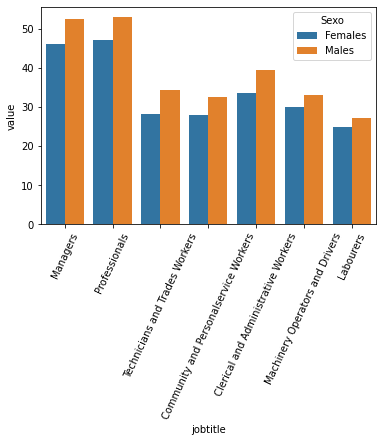

In [43]:
plt.xticks(rotation=65)
sns.barplot(x='jobtitle', y='value', data=df_clean_total[df_clean_total['Ano']==2017], hue="Sexo")

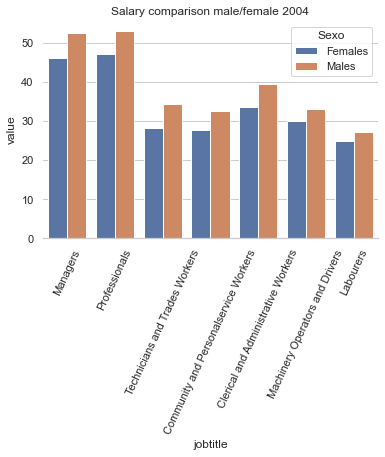

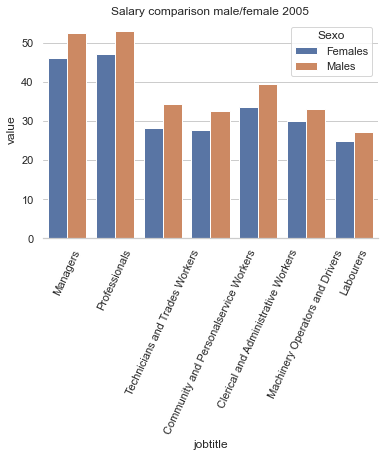

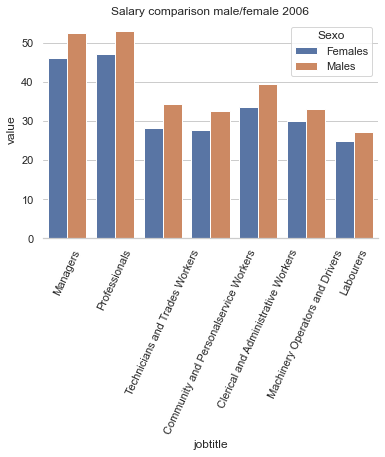

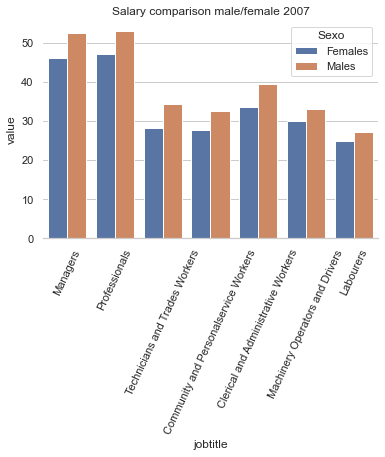

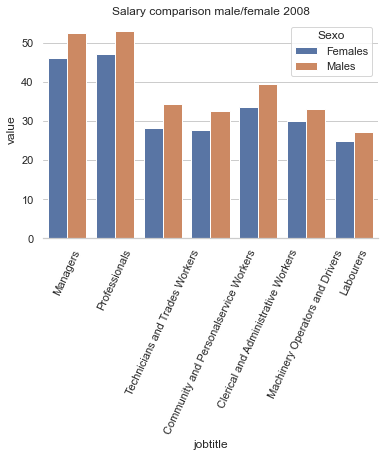

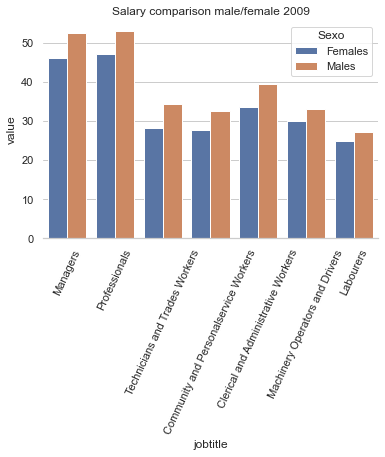

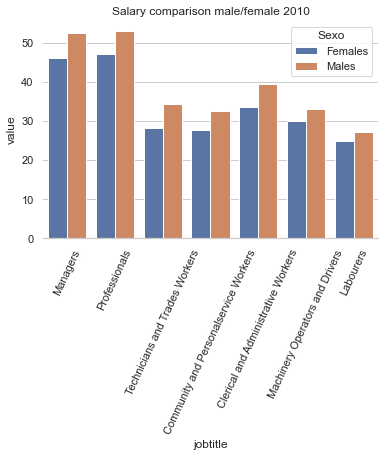

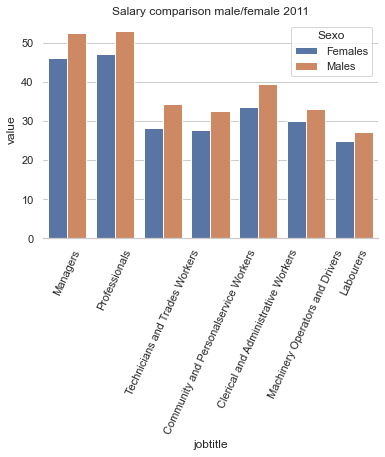

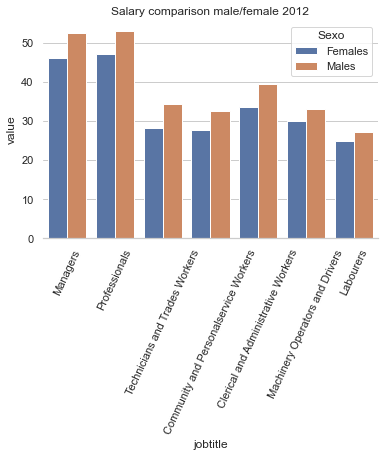

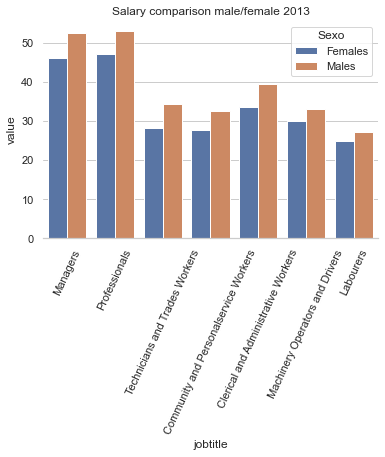

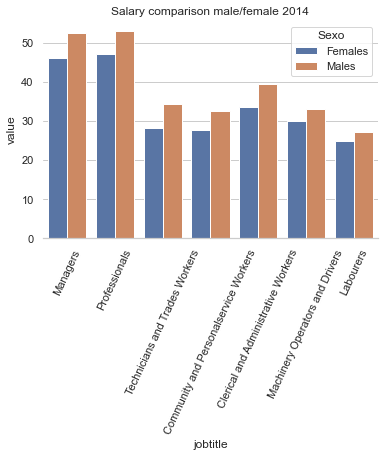

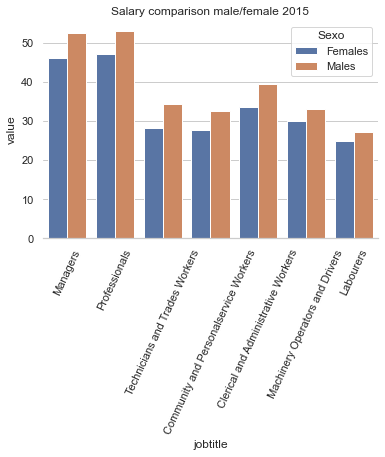

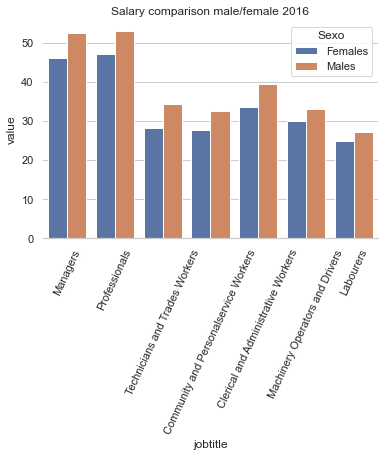

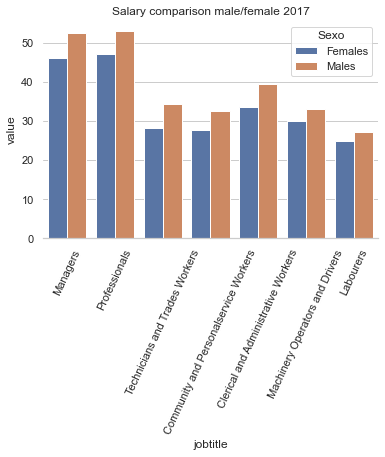

In [44]:
sns.set_theme(style="whitegrid")

for d in df_clean_total["Ano"].unique().tolist():
    # Draw a nested violinplot and split the violins for easier comparison
    plt.xticks(rotation=65)
    plt.title("Salary comparison male/female " + str(d))
    plt.xticks(rotation=65)
    sns.barplot(x='jobtitle', y='value', data=df_clean_total[df_clean_total['Ano']==2017], hue="Sexo")
    sns.despine(left=True)
    ax.set(xlabel='Job Descriptions', ylabel='Salary')
    plt.show()

In [45]:
#df_salaries.head(5)

In [46]:
sns.dist

AttributeError: module 'seaborn' has no attribute 'dist'

_______________
____________